**LASSO REGRESSION** - 
- Used to avoid overfitting in Linear Regression
- When we try to minimize error, to make it stop going to zero , we add an extra term alpha*absolute(m).

- New error becomes = **sum(ypred - yi)^2 + alpha x |m|**
- **alpha** is hyperparameter can be set between 0 and inf. and **m** is slope

- for higher alpha, **m** becomes 0 for some features. 
- Hence Lasso Regresion also helps in feature selection. as less important coefficient becomes 0

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression, make_classification
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score, r2_score, root_mean_squared_error

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20,random_state=13)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


[27.7670565]
-1.6795596944308935


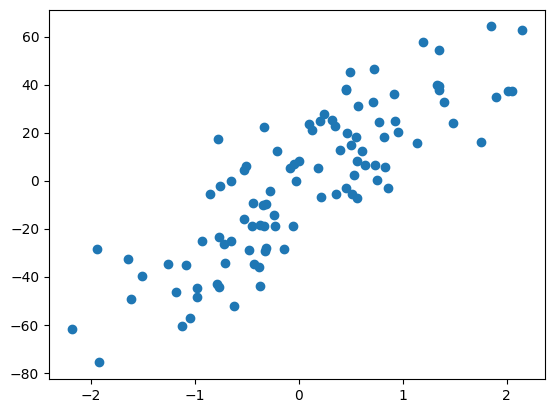

In [3]:
plt.scatter(X,y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)

C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

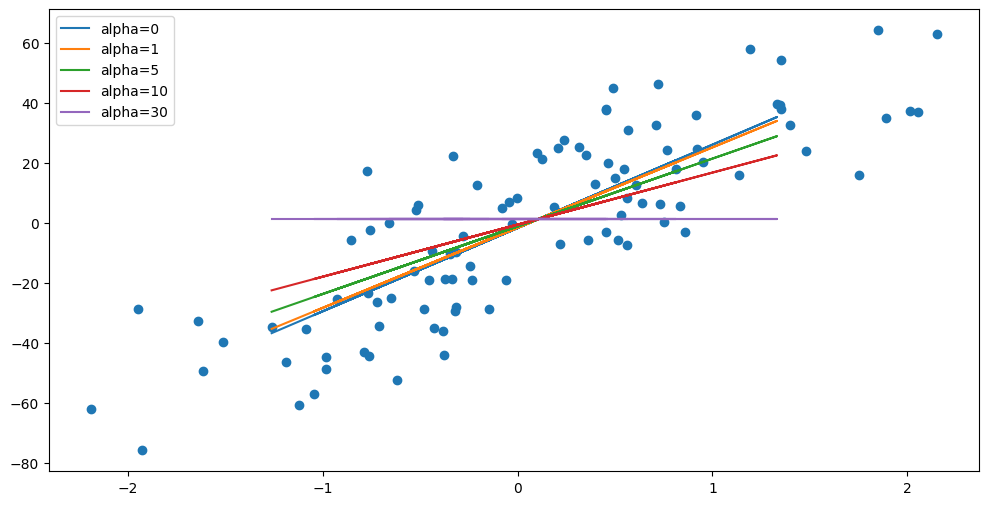

In [6]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    las = Lasso(alpha=i)
    las.fit(X_train, y_train)

    plt.plot(X_test, las.predict(X_test), label = 'alpha={}'.format(i))
plt.legend()
plt.show()

**Few Conclusion from Above**

- if alpha = 0 , Lasso will behave same as Linear Regression as **Loss(lasso) = Loss(LinearReg)**
- If alpha is increasing, slope is decreasing.
- if alpha is large , (for above scenario close to 30), then slope is becoming 0, that means **coefficient is becoming 0**

**BENIFITS of Coefficient becoming 0**
- for higher dimensional data, when alpha increases, those coefficient which are not important, becomes 0.
- So inherently, we are doing **feature selection**.


**1. How Coefficients are affected ? (Code implementation)**

In [7]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=13)

In [9]:
coef = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coef.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

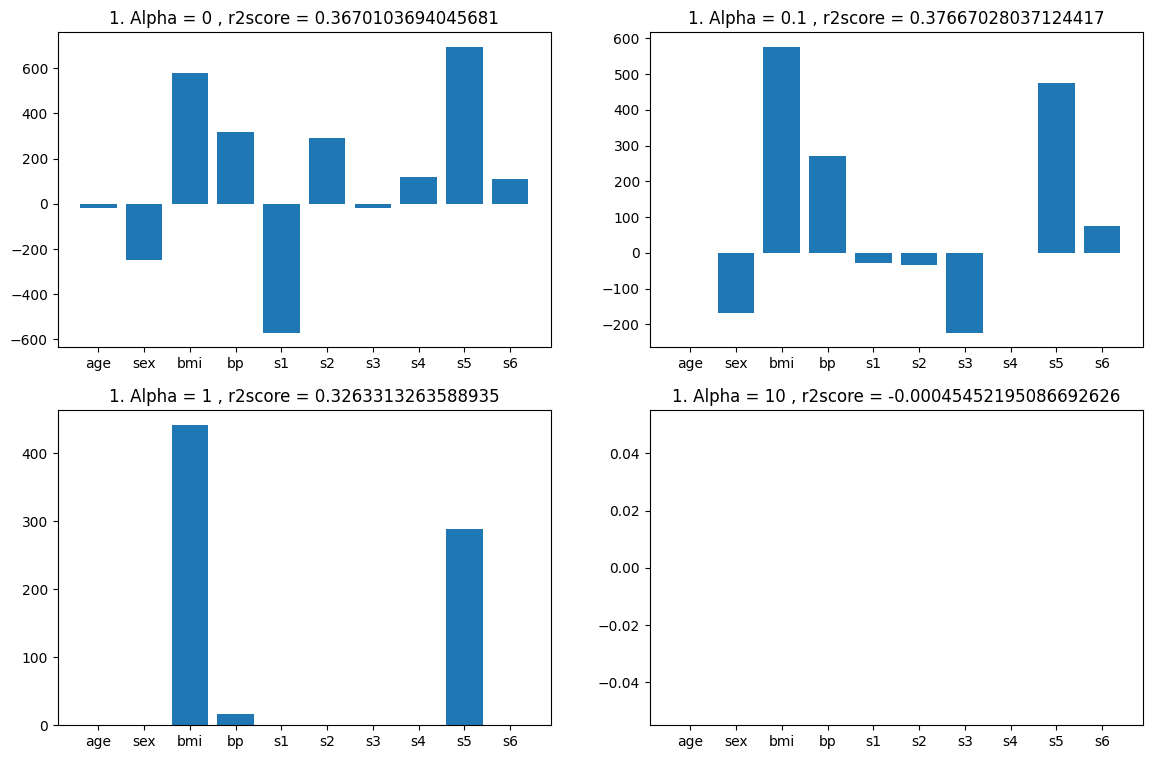

In [13]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coef[0])
plt.title(f'1. Alpha = 0 , r2score = {r2_scores[0]}')


plt.subplot(222)
plt.bar(data.feature_names, coef[1])
plt.title(f'1. Alpha = 0.1 , r2score = {r2_scores[1]}')

plt.subplot(223)
plt.bar(data.feature_names, coef[2])
plt.title(f'1. Alpha = 1 , r2score = {r2_scores[2]}')

plt.subplot(224)
plt.bar(data.feature_names, coef[3])
plt.title(f'1. Alpha = 10 , r2score = {r2_scores[3]}')

plt.show()